# 분석 환경 설정

In [45]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,10]

In [ ]:
# 시각화를 위한 폰트설정
# 구글코랩 사용시 폰트 설정 필요
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보임
# 한글 출력 가능하게 폰트설정
# 설치 후 런타임 재실행 필수!

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# Colab의 한글폰트 설정
plt.rc('font', family = 'NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus = False)
# 레티나 설정 시 글씨가 좀 더 선명히 보임
# 폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 넷플릭스 프로그램 총계 분석

In [4]:
#구글 드라이브 연동하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/netflix_titles.csv')
netflix.shape

(7787, 12)

In [6]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
# 결측치 확인
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

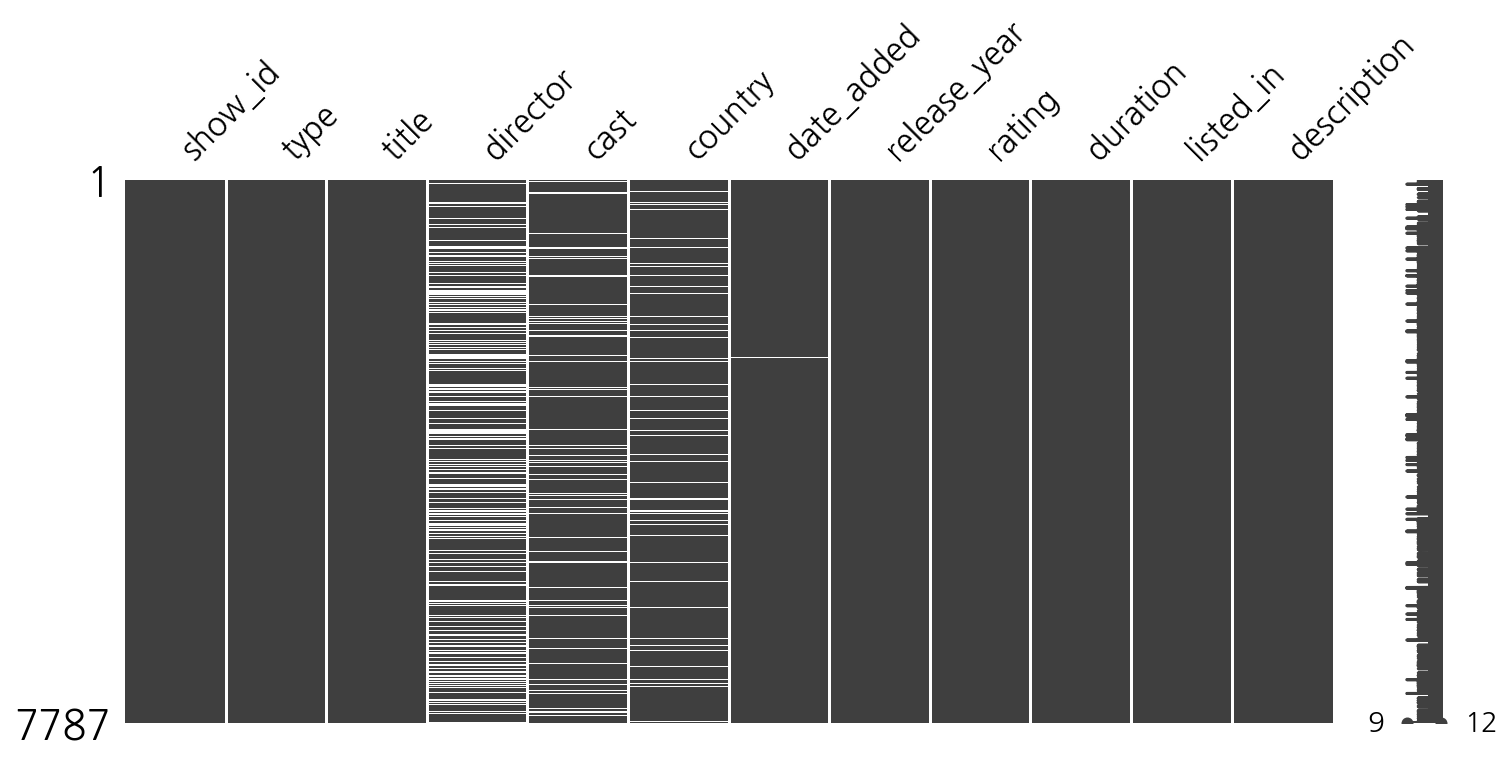

In [44]:
# 결측치 시각화
import missingno as msno

msno.matrix(netflix, figsize = (12,5))

In [8]:
# 데이터 타입 확인
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

5377


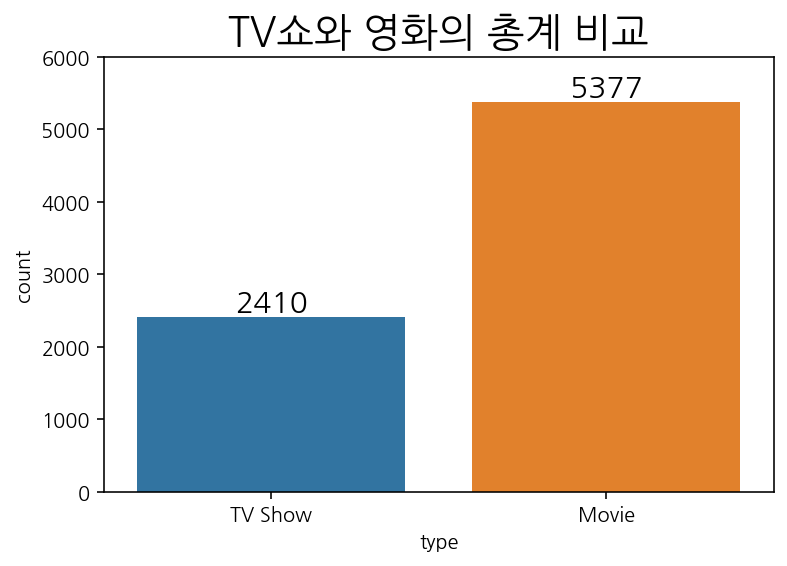

In [9]:
# TV쇼와 영화의 총계 비교 시각화
import math
def roundup(x):
    return 100 + int(math.ceil(x/100.0)) * 100
sns.countplot(x = 'type', data = netflix)
ax = plt.gca()

# y축을 늘려 시각적으로 보기 편하게 변경
print(netflix['type'].value_counts().max())
y_max = netflix['type'].value_counts().max()
ax.set_ylim([0,6000])
# 그래프 정보 정확하게 보여주기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')
plt.title('TV쇼와 영화의 총계 비교', size='20')
plt.show()

In [10]:
# 데이터 정리
mov = netflix[netflix.type == 'Movie']
TV = netflix[netflix.type == 'TV Show']

# 영화

In [11]:
# 넷플릭스 영화 개봉연도 확인
mov['release_year'].unique()

array([2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015, 2020,
       2010, 2005, 2012, 2006, 2013, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       1973, 1967, 1960, 1981, 1958, 1976, 2021, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1942, 1969, 1955, 1963, 1964,
       1954, 1970, 1944, 1947, 1959, 1943])

4238


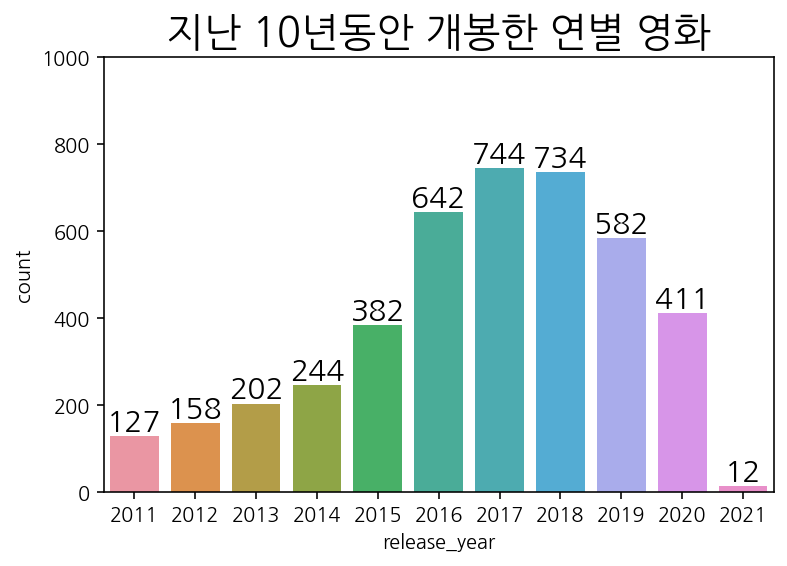

In [12]:
# 2011년도 이후 영화
recent = mov[mov.release_year >= 2011]
sns.countplot(x = 'release_year', data = recent)
ax =plt.gca()

# y축 최대 값 설정
print(recent['type'].value_counts().max())
y_max = recent['type'].value_counts().max()
ax.set_ylim([0,1000])

# 데이터 시각적으로 이해 쉽게 만들기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')
    
plt.title('지난 10년동안 개봉한 연별 영화', size = '20')
plt.show()

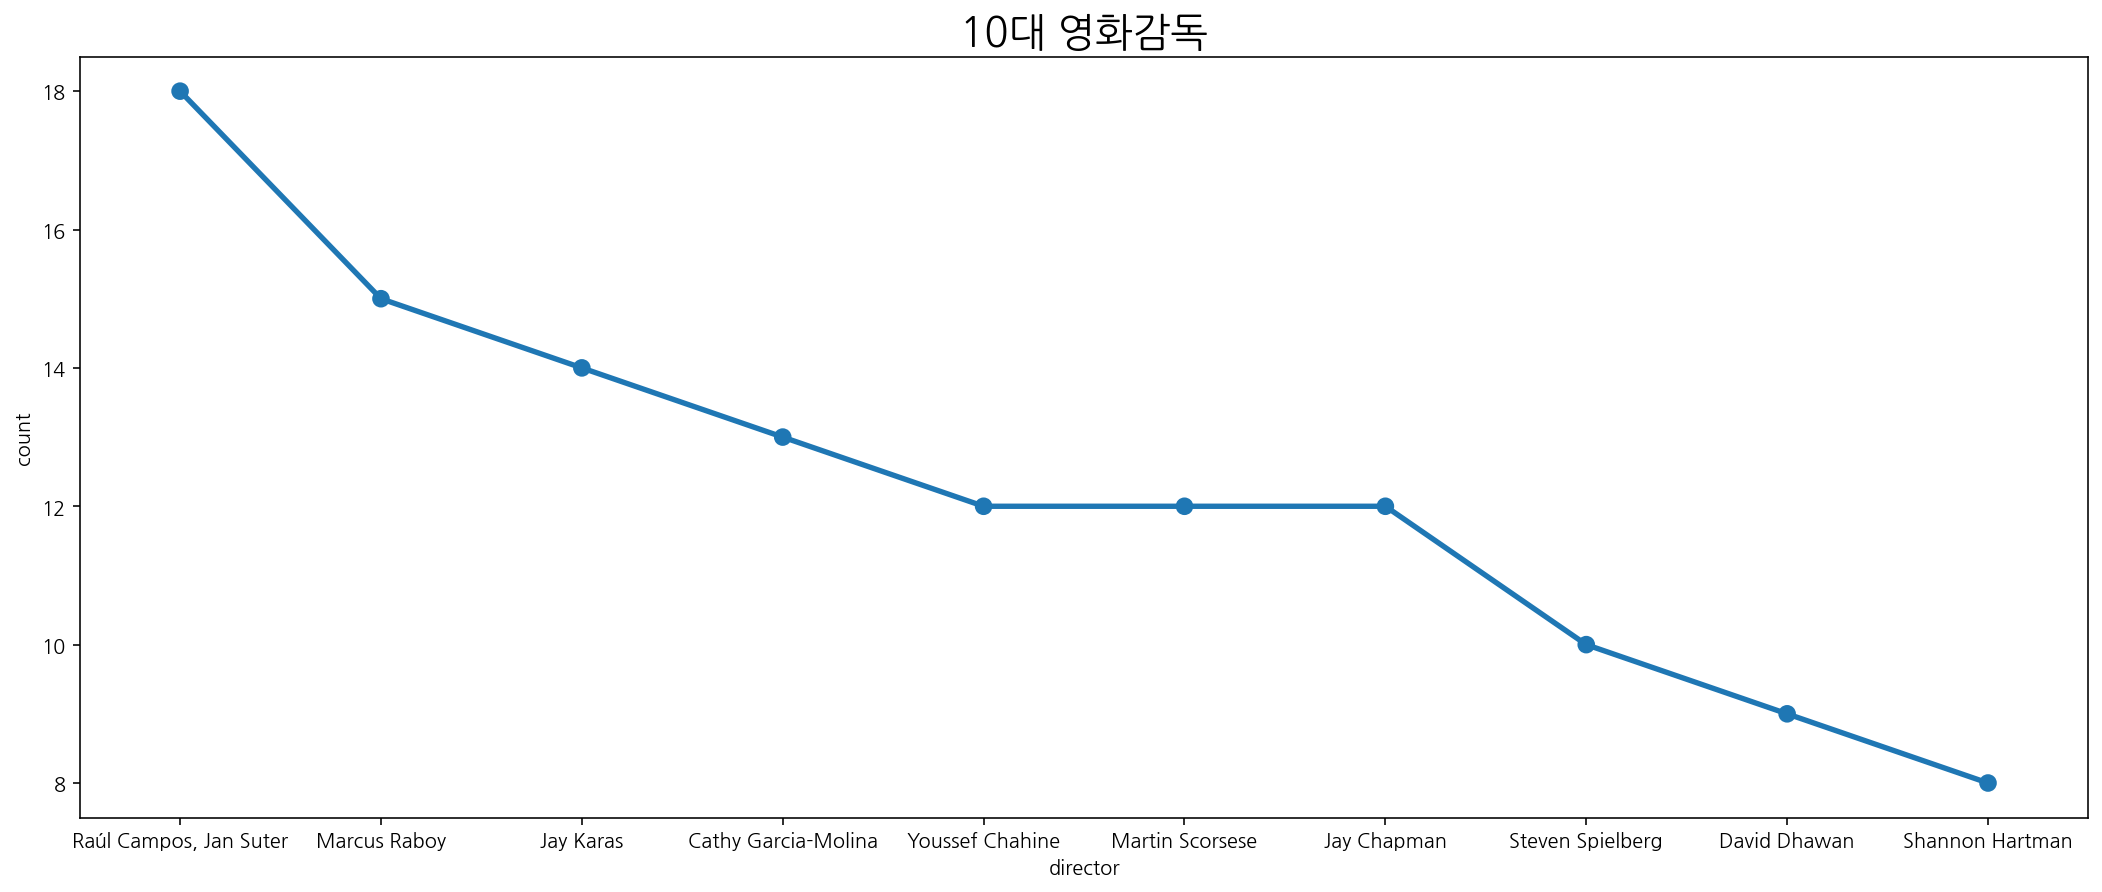

In [13]:
# 영화 감독별 개봉작품 수(10대 영화감독) 시각화
mov_director = mov.groupby(
    ['director'])['show_id'].count().reset_index(name='count').sort_values(
        by='count',ascending=False)
fig, ax = plt.subplots(figsize = (18,7))
sns.pointplot(x = 'director', y = 'count', data = mov_director.head(10))
plt.title('10대 영화감독', size = '20')
plt.show()

In [49]:
# 영화 순위
mov_rating = mov.rating.value_counts().sort_index()
mov_rating

G             39
NC-17          3
NR            79
PG           247
PG-13        386
R            663
TV-14       1272
TV-G         111
TV-MA       1845
TV-PG        505
TV-Y         117
TV-Y7         95
TV-Y7-FV       5
UR             5
Name: rating, dtype: int64

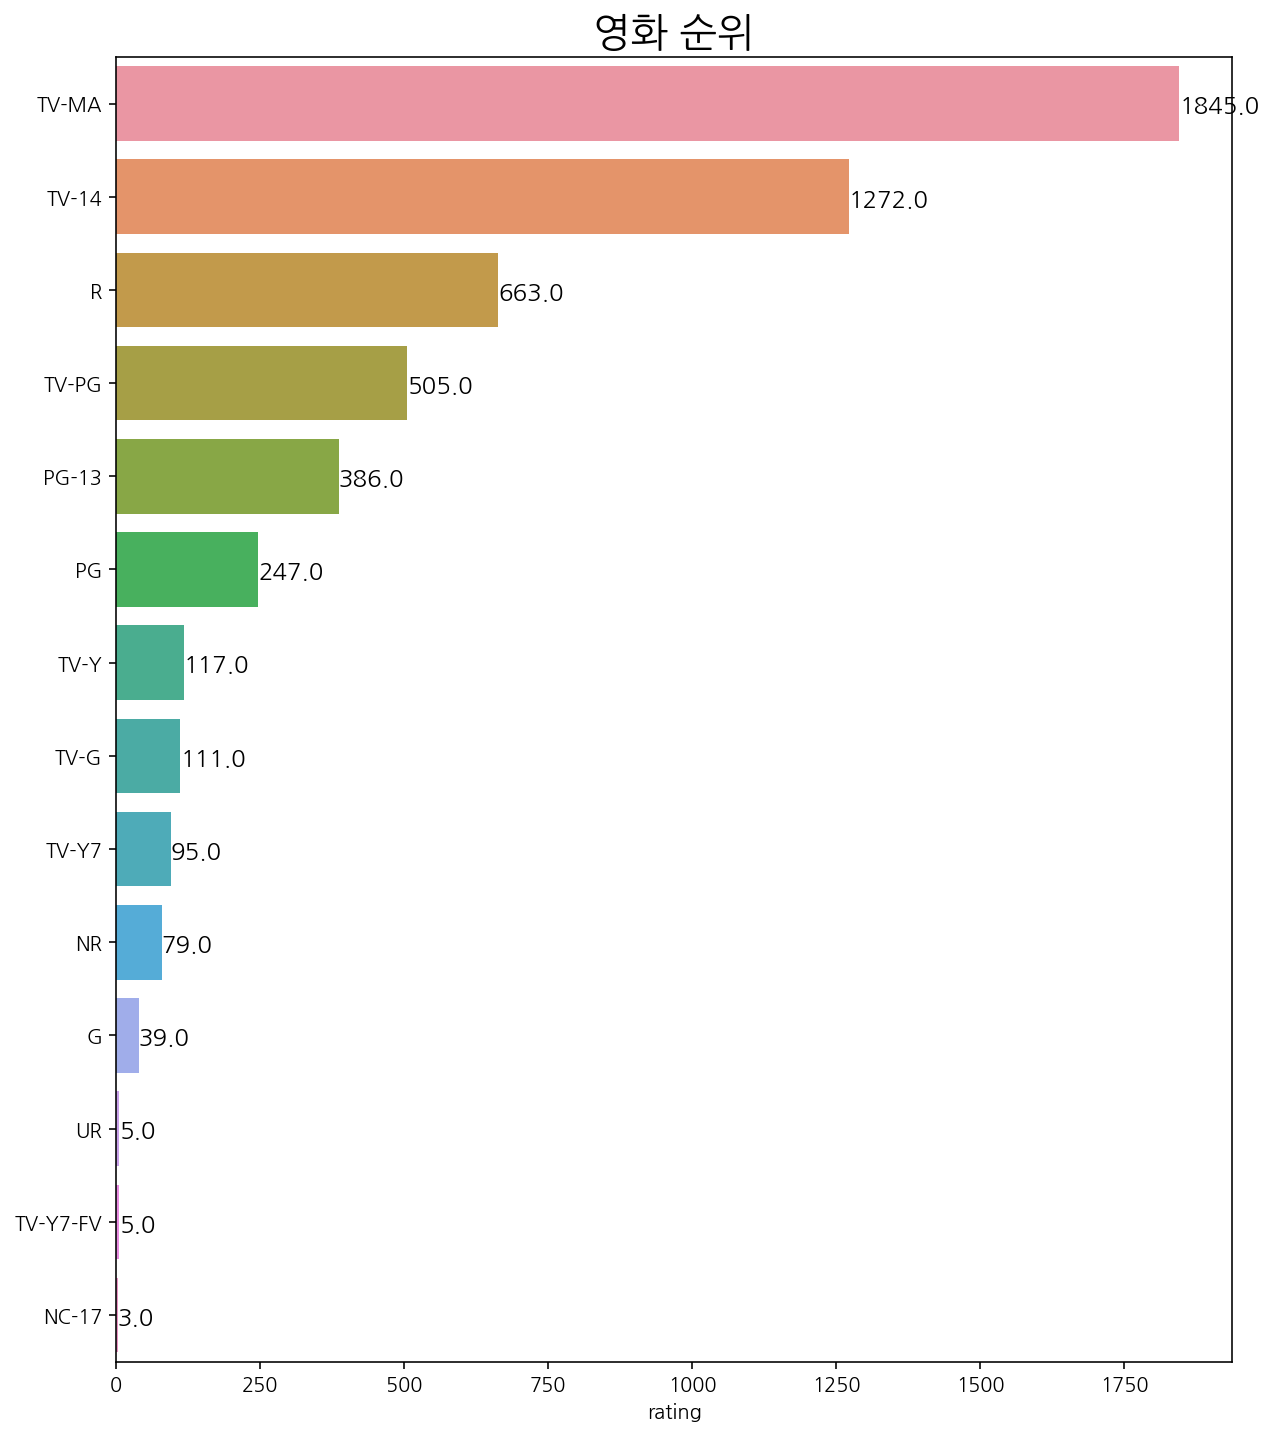

In [53]:
# 영화 순위 시각화
plt.figure(figsize=(10,12))
bar = mov[mov.type == 'Movie'].rating.value_counts()[:14]
sns.barplot(x = bar, y =bar.index)
ax = plt.gca()
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()),2)),
           fontsize = 12, color = 'black')
  plt.title("영화 순위", size = '20')

In [61]:
# 넷플렉스에 나라별 영화 TOP10
mov_coun = mov[mov.type == 'Movie'].country.value_counts()[:10]
mov_coun

United States     1850
India              852
United Kingdom     193
Canada             118
Egypt               89
Spain               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: country, dtype: int64

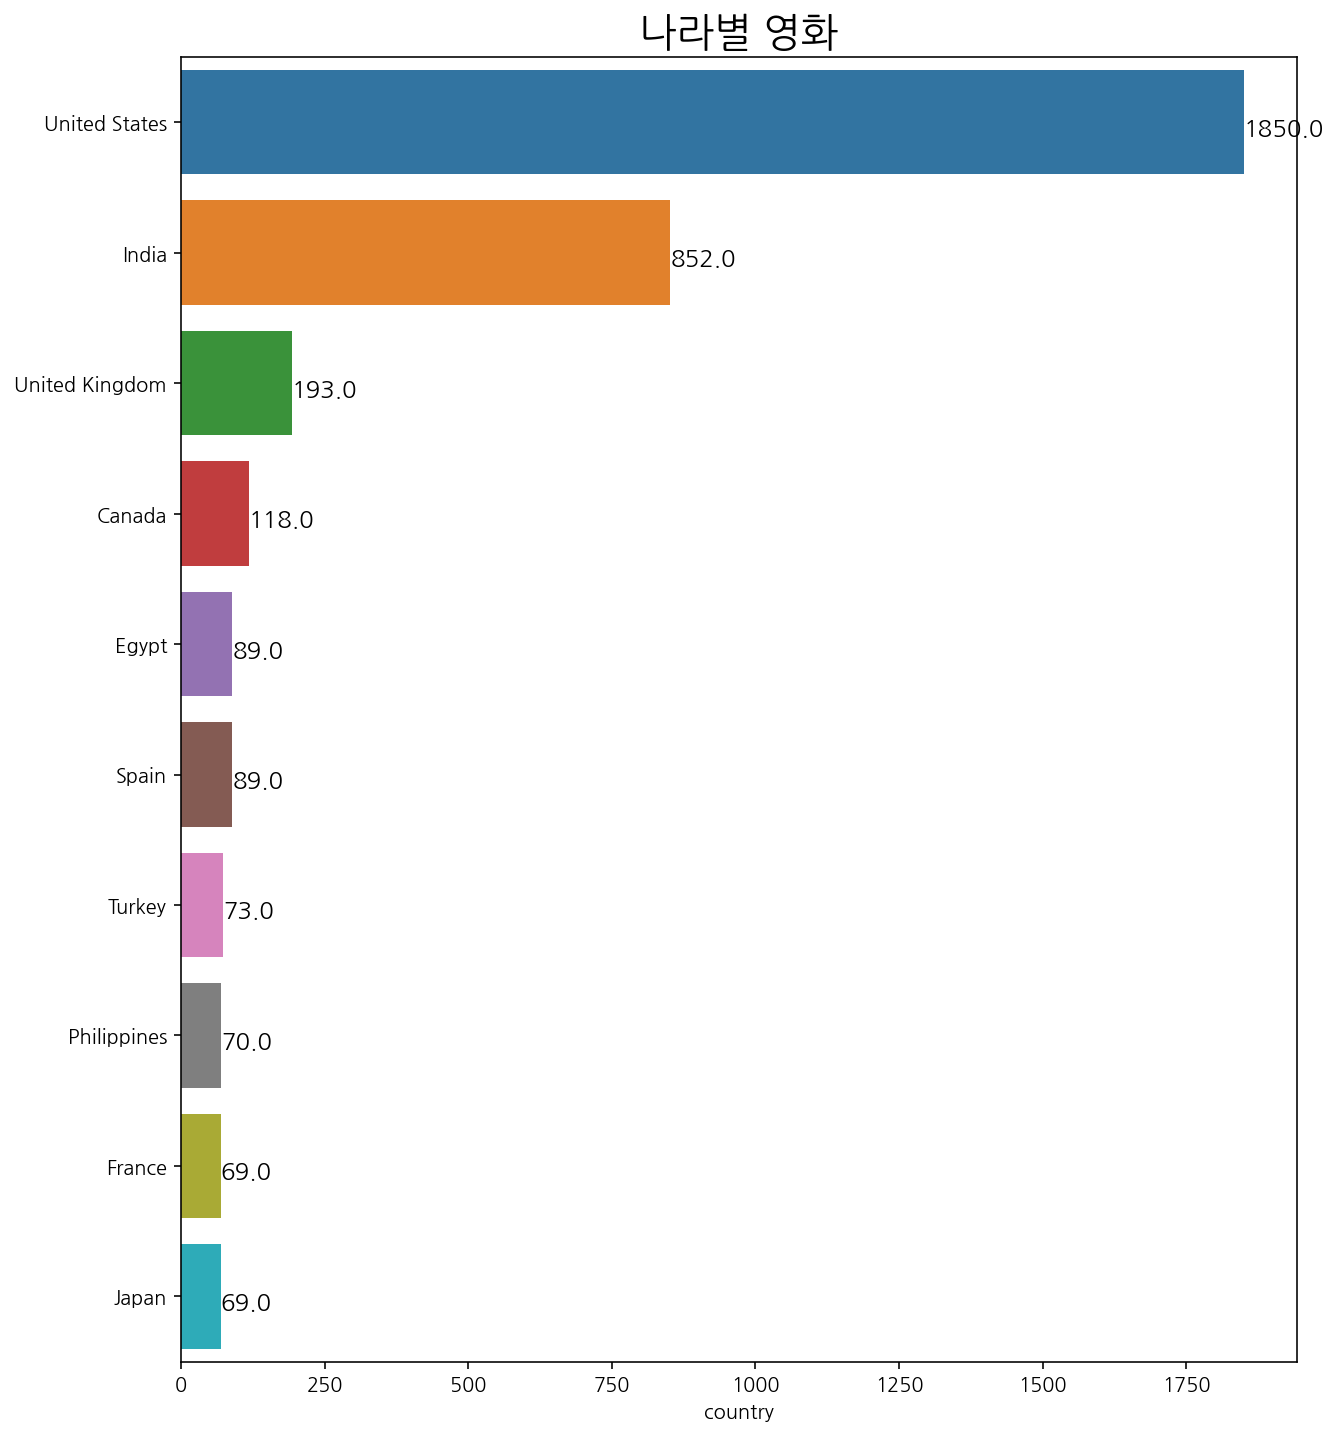

In [62]:
# 나라별 영화 수 시각화
plt.figure(figsize=(10,12))
bar = mov[mov.type == 'Movie'].country.value_counts()[:10]
sns.barplot(x = bar, y =bar.index)
ax = plt.gca()
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()),2)),
           fontsize = 12, color = 'black')
  plt.title("나라별 영화", size = '20')

# TV

In [54]:
TV.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [55]:
TV['release_year'].unique()

array([2020, 2016, 2018, 2019, 2013, 2017, 2014, 2006, 2010, 2015, 2012,
       2011, 2003, 2009, 2007, 2001, 1997, 2021, 1991, 2005, 1999, 1992,
       1994, 2008, 1977, 2002, 1979, 1998, 1988, 1990, 1996, 2004, 2000,
       1972, 1974, 1995, 1981, 1946, 1925, 1985, 1986, 1968, 1993, 1967,
       1989, 1963])

2199


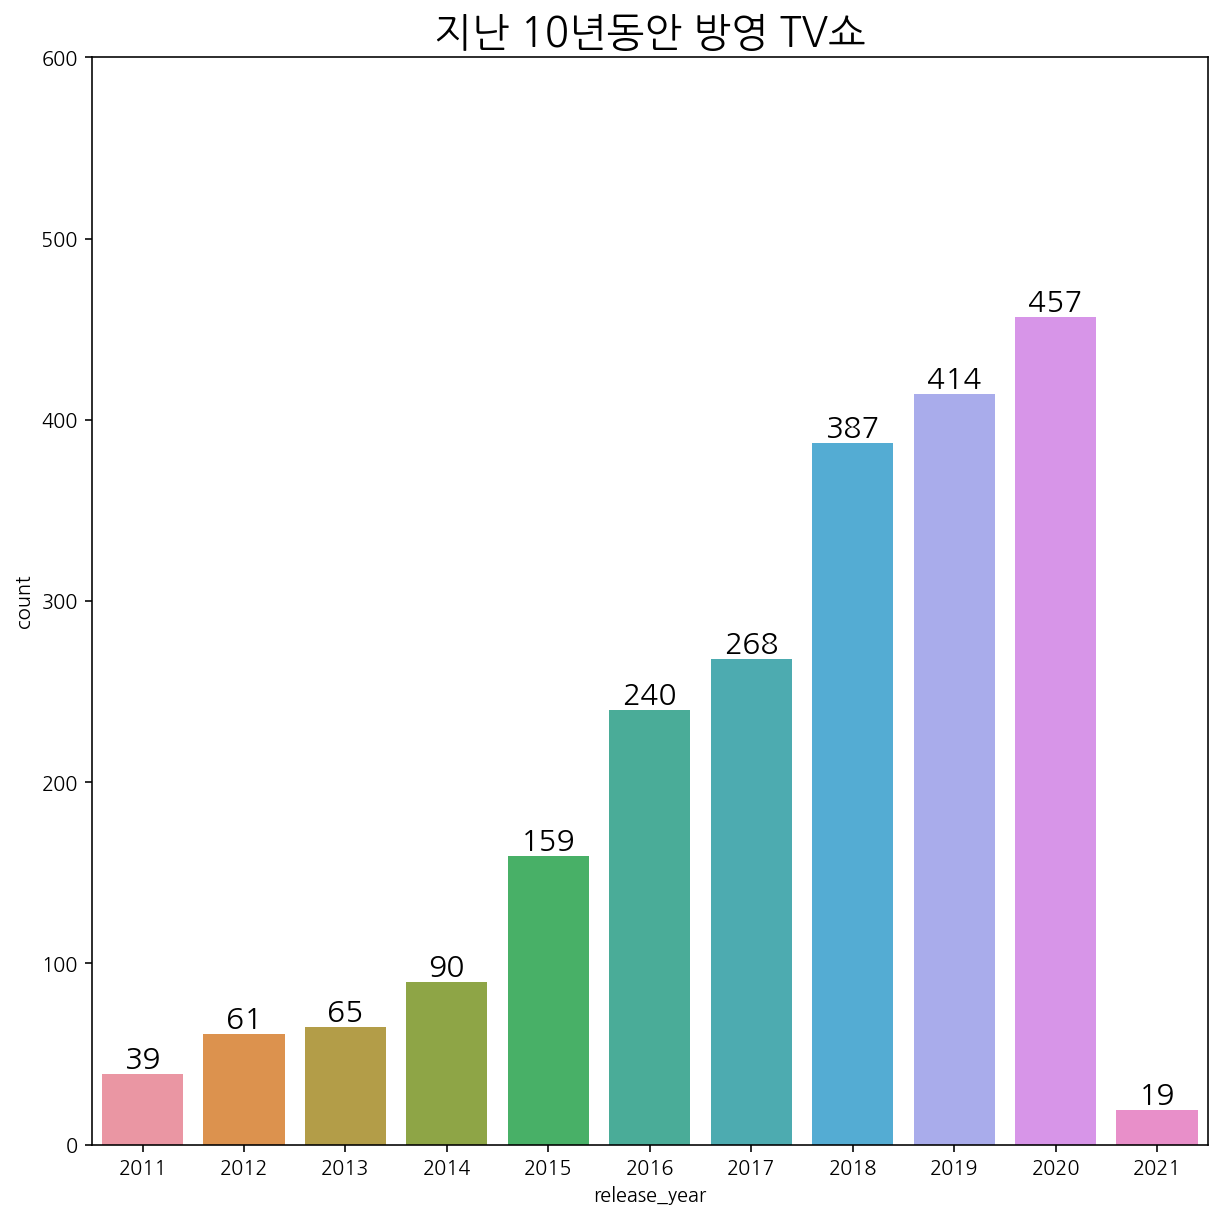

In [56]:
# 2011년도 이후 TV Show
recent = TV[TV.release_year >= 2011]
sns.countplot(x = 'release_year', data = recent)
ax =plt.gca()

# y축 최대 값 설정
print(recent['type'].value_counts().max())
y_max = recent['type'].value_counts().max()
ax.set_ylim([0,600])

# 데이터 시각적으로 이해 쉽게 만들기
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=15, color='black', ha='center', va='bottom')
    
plt.title('지난 10년동안 방영 TV쇼', size = '20')
plt.show()

In [57]:
# TV Show 순위
TV_rating = TV.rating.value_counts().sort_index()
TV_rating

NR             5
R              2
TV-14        659
TV-G          83
TV-MA       1018
TV-PG        301
TV-Y         163
TV-Y7        176
TV-Y7-FV       1
Name: rating, dtype: int64

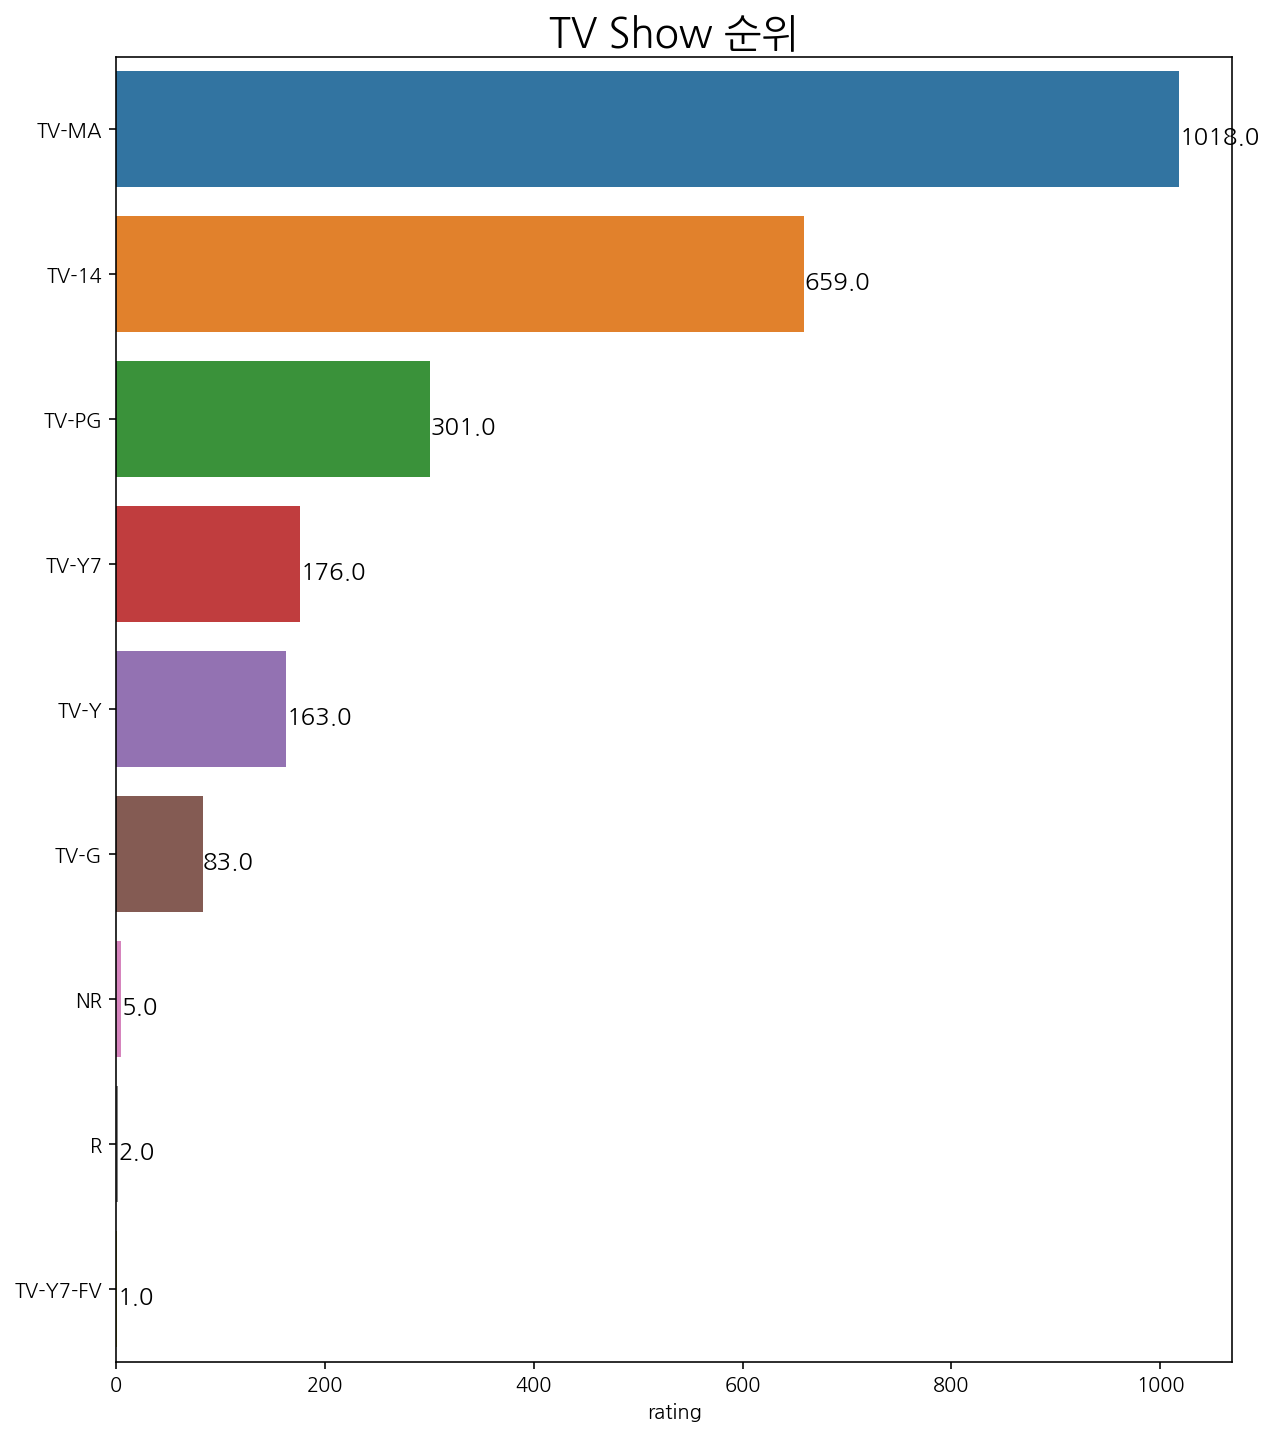

In [59]:
# TV Show 순위 시각화
plt.figure(figsize=(10,12))
bar = TV[TV.type == 'TV Show'].rating.value_counts()[:14]
sns.barplot(x = bar, y =bar.index)
ax = plt.gca()
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()),2)),
           fontsize = 12, color = 'black')
  plt.title("TV Show 순위", size = '20')

In [64]:
# 넷플렉스에 나라별 TV Show TOP10
TV_coun = TV[TV.type == 'TV Show'].country.value_counts()[:10]
TV_coun

United States     705
United Kingdom    204
Japan             157
South Korea       147
India              71
Taiwan             68
Canada             59
France             46
Australia          46
Spain              45
Name: country, dtype: int64

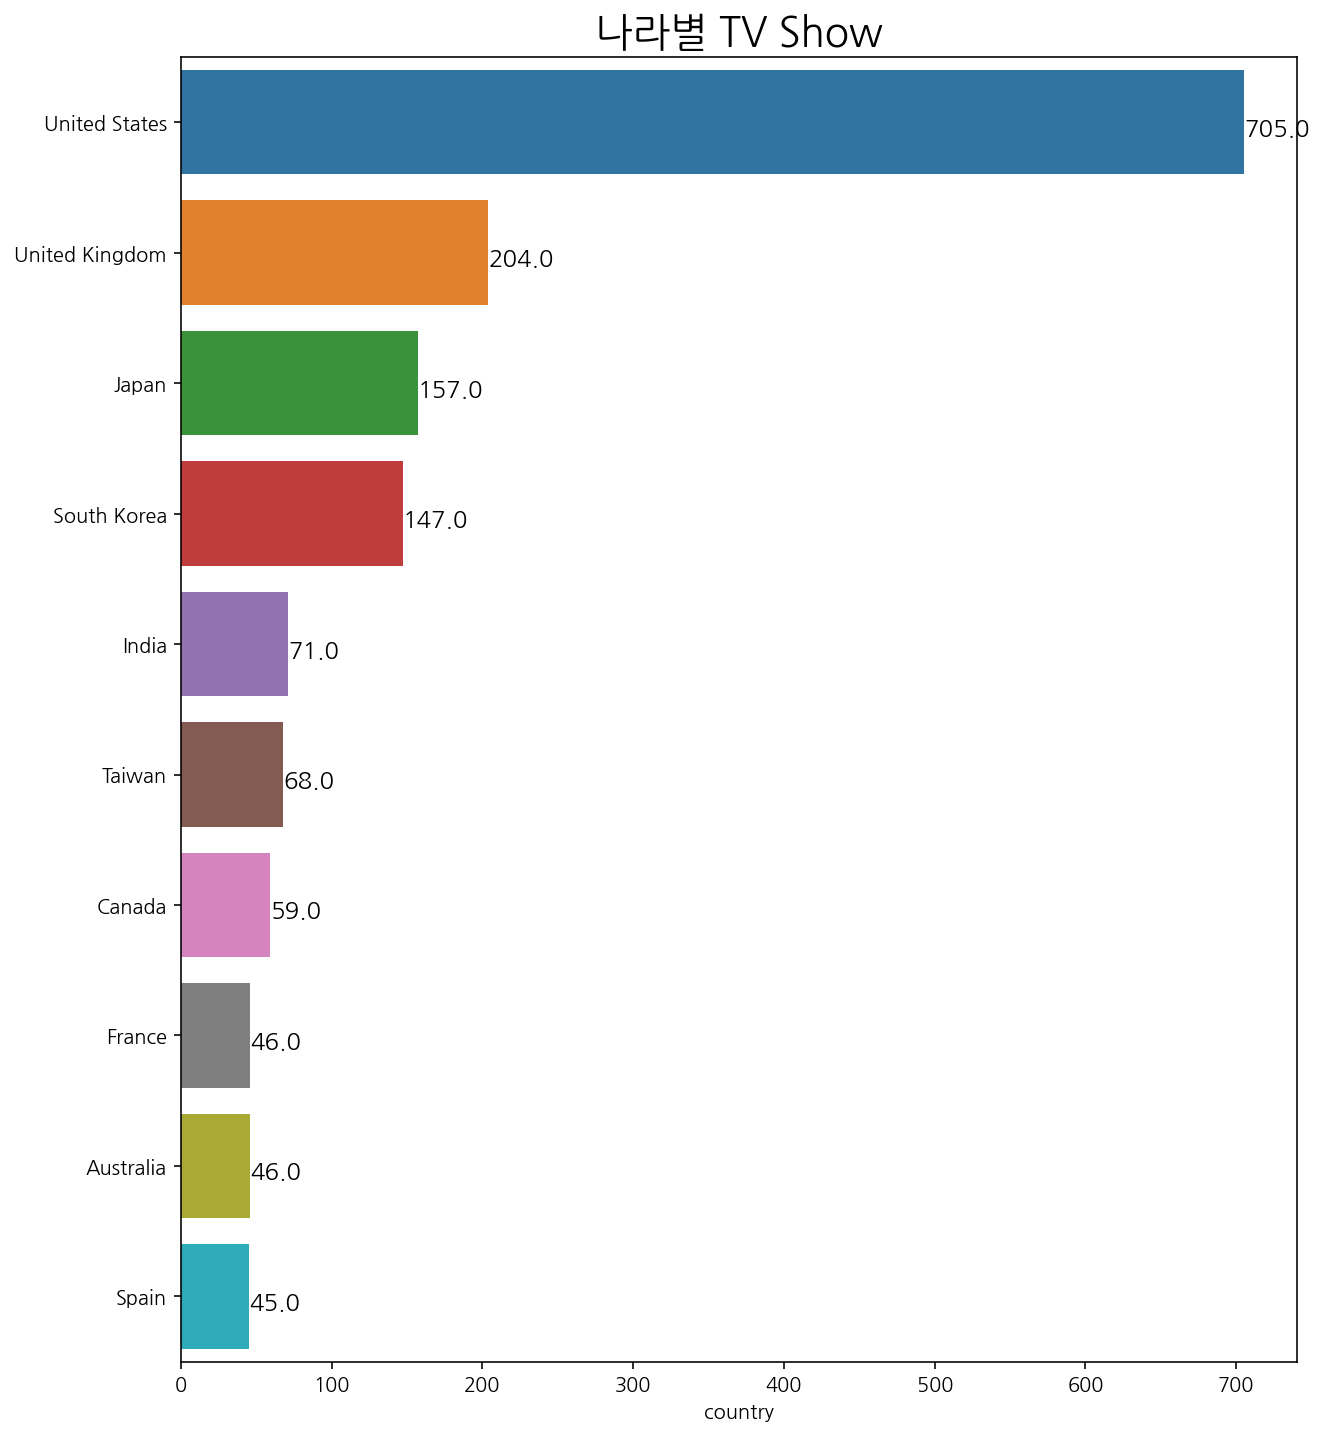

In [66]:
# 나라별 TV Show 수 시각화
plt.figure(figsize=(10,12))
bar = TV[TV.type == 'TV Show'].country.value_counts()[:10]
sns.barplot(x = bar, y =bar.index)
ax = plt.gca()
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()),2)),
           fontsize = 12, color = 'black')
  plt.title("나라별 TV Show", size = '20')

# 지난 10년 간의 영화와 TV Show 개봉의 트랜드

In [88]:
# 데이터 분리
recent10 = netflix[netflix.release_year > 2011]
recent10.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."


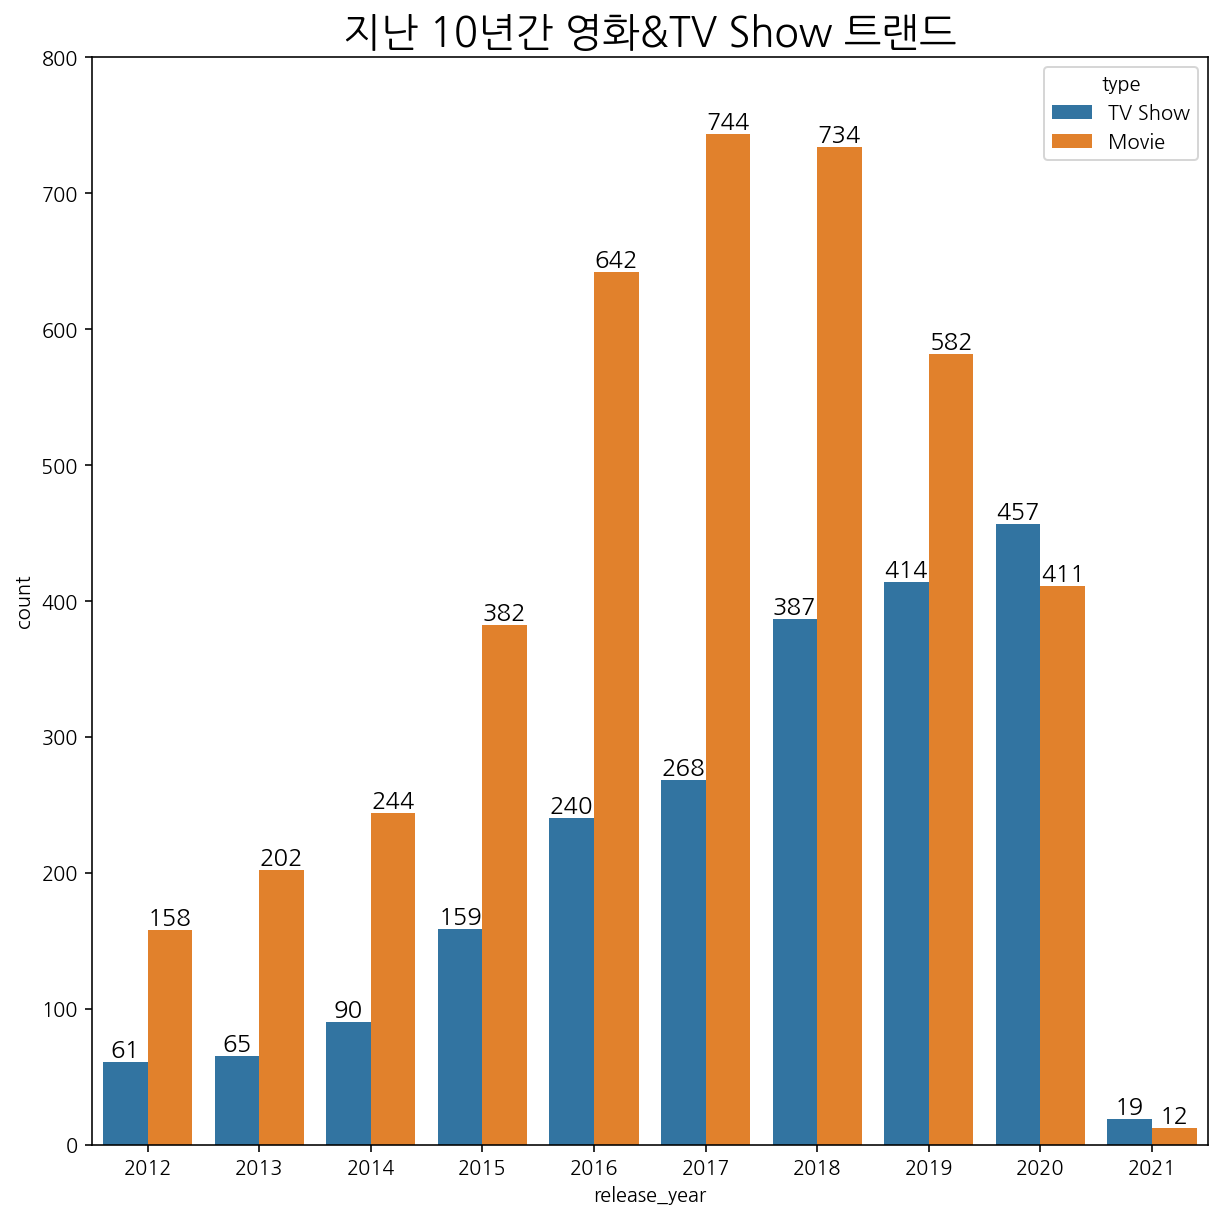

In [86]:
# 분리한 데이터 시각화
sns.countplot(data = recent10, x = 'release_year', hue='type')
ax =plt.gca()

# y축 최대 값 설정
y_max = recent10['type'].value_counts().max()
ax.set_ylim([0,800])

# 자세하게 시각화
for p in ax.patches:
  ax.text(p.get_x()+ p.get_width()/2., p.get_height(), '%d' %int(p.get_height()), 
          fontsize = 12, color = 'black', ha='center', va='bottom')
plt.title('지난 10년간 영화&TV Show 트랜드', size = '20')
plt.show()

# 넷플릭스 장르 분석

In [92]:
# 데이터 장르별로 나눠 출력
netflix2 = pd.DataFrame(netflix.listed_in.str.split('[,&]+').tolist(),
           index=netflix.show_id).stack()
netflix2_count = netflix2.value_counts()[:10]
netflix2_count

 International Movies     2323
Dramas                    1384
Comedies                  1074
 Adventure                 871
Documentaries              751
 Dramas                    722
Action                     721
International TV Shows     690
 Independent Movies        653
 TV Dramas                 642
dtype: int64

In [103]:
netflix2.value_counts().max()

2323

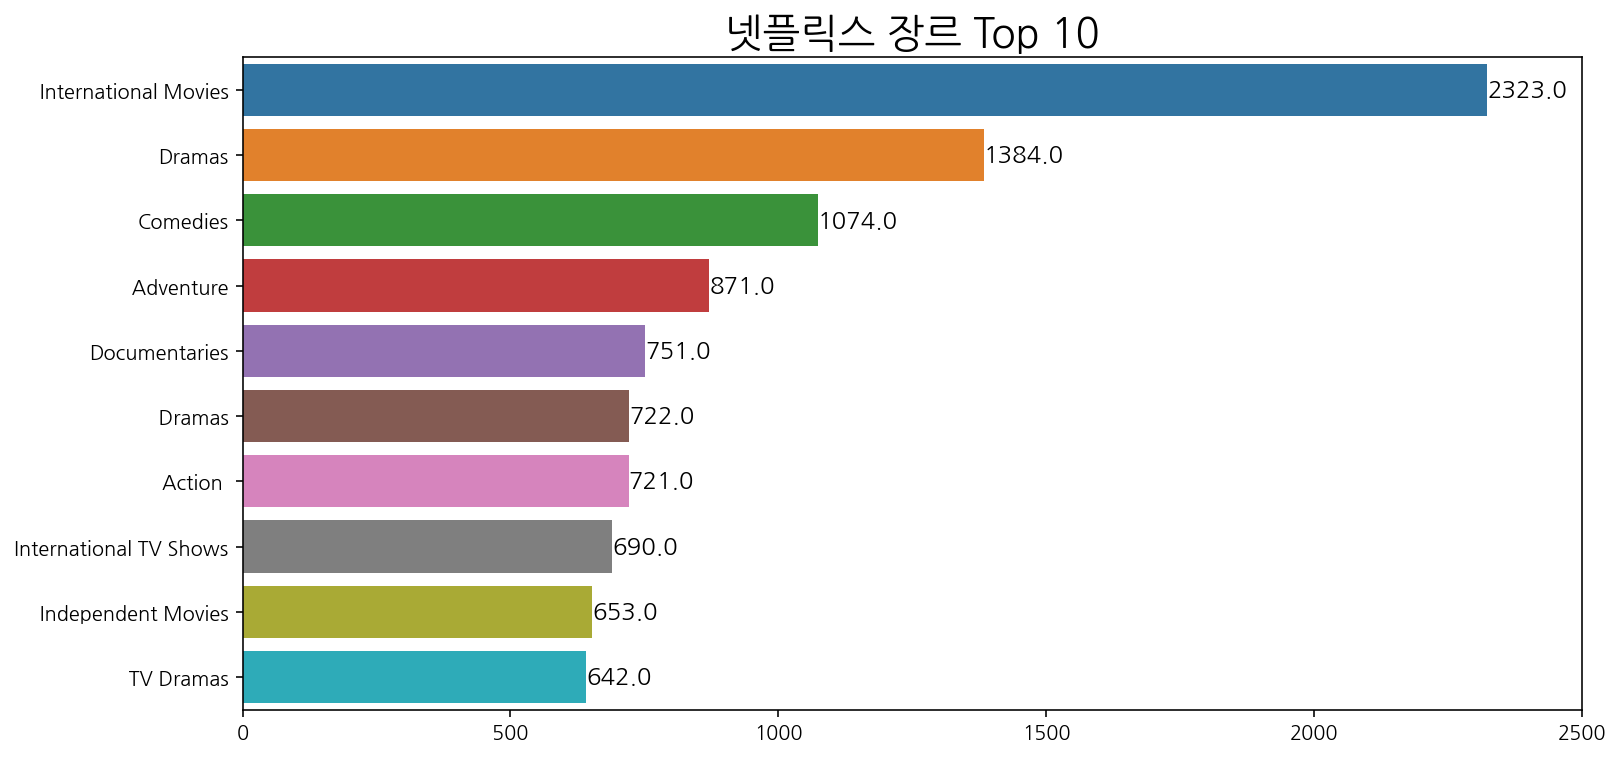

In [105]:
# 출력한 데이터 시각화
plt.figure(figsize=(12,6))
sns.barplot(x = netflix2_count, y = netflix2_count.index)
ax = plt.gca()
# x축 최대 값 설정
x_max = netflix2.value_counts().max()
ax.set_xlim([0,2500])

for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()),2)),
           fontsize = 12, color = 'black')
plt.title('넷플릭스 장르 Top 10', size='20')
plt.show()